In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking Null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Creating a coopy of orignal data
df_new=df.copy()

In [8]:
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Since Cabin has many null values and it is nopt necessary in analysis so we can drop the Cabin Feature
df_new.drop(['Cabin'],axis=1,inplace=True)

In [10]:
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
# Analysing Embarked Feature
df_new["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df_new["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
embarked_mode=df_new["Embarked"].mode()[0]
embarked_mode

'S'

In [14]:
# Replacing Null vaues in Embarked with Mode
df_new["Embarked"].fillna(embarked_mode,inplace=True)

In [15]:
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
df_new.shape

(891, 11)

In [17]:
# Analysing Age Features
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
# Filling Null vaues with median Age
median_age = df_new["Age"].median()
df_new["Age"].fillna(median_age, inplace=True)

In [19]:
df_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis(EDA)

In [21]:
# Count of Passenger Survived
df_new["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

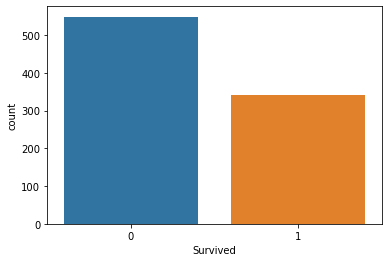

In [22]:
sns.countplot(x="Survived",data=df_new)

Here O reperesent Not Survived and 1 Represent Survived.So from above graph we can concude that count of passenger Not Survived is High

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df_new["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

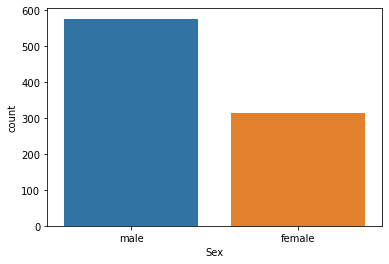

In [25]:
# Count of Male and Female
sns.countplot(x="Sex",data=df_new)

<AxesSubplot:xlabel='Survived', ylabel='count'>

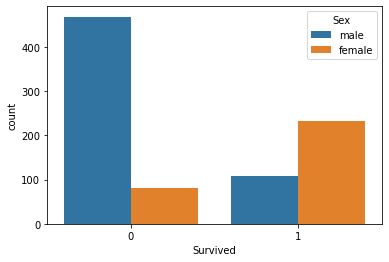

In [26]:
# Checking How many mae and female passengers survived
sns.countplot(x="Survived",data=df_new,hue="Sex")

In [27]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

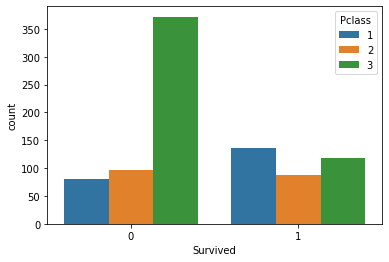

In [28]:
# Visualizing survivals based on Class
sns.countplot(x="Survived",data=df_new,hue="Pclass")

In [29]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

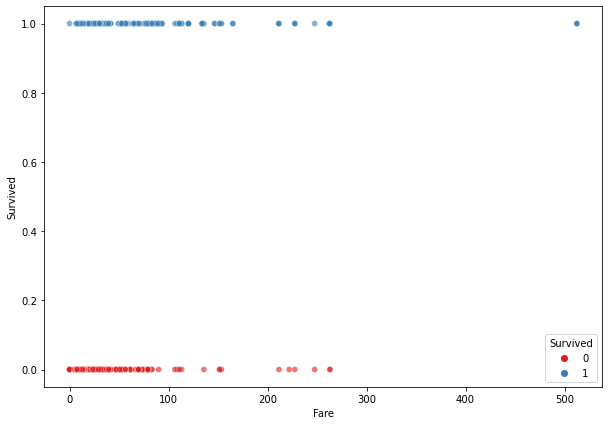

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Fare", y="Survived", data=df_new, hue="Survived", palette="Set1", alpha=0.6)
plt.show()

In [31]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
# Dropping more irrevalant column
df_new.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [34]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
# Converting Categorical column into Numerical

df_new["Sex"]=df_new.Sex.map({'female':0, 'male':1})

In [36]:
df_new["Embarked"]=df_new.Embarked.map({'S':0,'C':1,'Q':2})

In [37]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


# Model Building

In [38]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
# Splitting into X and Y
X=df_new.drop(['Survived'],axis=1)
Y=df_new['Survived']

In [40]:
# Importing Libraries for training data and testing data
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
prediction_rf=rf.predict(X_test)

In [43]:
print(prediction_rf)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [44]:
# Checking the accuracy of Random Forest
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [45]:
print(confusion_matrix(Y_test,prediction_rf))

[[88 17]
 [18 56]]


In [46]:
precision = precision_score(Y_test,prediction_rf)
recall = recall_score(Y_test,prediction_rf)
f1 = f1_score(Y_test,prediction_rf)

In [47]:
print('precision:',precision)
print("Recall:", recall)
print("F1 Score:", f1)

precision: 0.7671232876712328
Recall: 0.7567567567567568
F1 Score: 0.761904761904762


In [48]:
accuracy=accuracy_score(Y_test,prediction_rf)
print('Accuracy:',accuracy)

Accuracy: 0.8044692737430168


In [49]:
# Accuracy of Random Forest Model is 81%

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
prediction_dt=dt.predict(X_test)
print(prediction_dt)

[0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]


In [52]:
print(confusion_matrix(Y_test,prediction_dt))

[[86 19]
 [19 55]]


In [53]:
precision = precision_score(Y_test,prediction_dt)
recall = recall_score(Y_test,prediction_dt)
f1 = f1_score(Y_test,prediction_dt)

In [54]:
print('precision:',precision)
print("Recall:", recall)
print("F1 Score:", f1)

precision: 0.7432432432432432
Recall: 0.7432432432432432
F1 Score: 0.7432432432432431


In [55]:
accuracy=accuracy_score(Y_test,prediction_dt)
print('Accuracy:',accuracy)

Accuracy: 0.7877094972067039


In [56]:
# Accuracy of Decision tree is 78.21%

# K-Nearest Neighbours(KNN)

In [57]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [58]:
knn=KNN()
knn.fit(X_train,Y_train)
prediction_knn=knn.predict(X_test)
print(prediction_knn)

[0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]


In [59]:
confusion_matrix(Y_test,prediction_knn)

array([[89, 16],
       [35, 39]], dtype=int64)

In [60]:
precision = precision_score(Y_test,prediction_knn)
recall = recall_score(Y_test,prediction_knn)
f1 = f1_score(Y_test,prediction_knn)

In [61]:
print('precision:',precision)
print("Recall:", recall)
print("F1 Score:", f1)

precision: 0.7090909090909091
Recall: 0.527027027027027
F1 Score: 0.6046511627906976


In [62]:
accuracy=accuracy_score(Y_test,prediction_knn)
print('Accuracy:',accuracy)

Accuracy: 0.7150837988826816


In [63]:
# Accuracy of KNN is 71.50%

In [64]:
# Using Random Forest Hyperparameter
# Importing Randomized search CV for hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
cls_rf=RandomForestClassifier()

In [65]:
# np.linspace(start=100,stop=1000,num=6)

In [66]:
# Adding parameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[5,10,15,100]

In [67]:
# Creating a dictionary
CV_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [68]:
CV_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [69]:
# Training and testing using RandomizeedSearchCV
rf_random=RandomizedSearchCV(estimator=cls_rf,param_distributions=CV_grid,cv=5,random_state=42)

In [70]:
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42)

In [71]:
# Thesr are best parameters find by applying Randomized Search Cv
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'log2',
 'max_depth': 30}

In [72]:
prediction_rcv=rf_random.predict(X_test)

In [73]:
accuracy = accuracy_score(Y_test, prediction_rcv)
print("Accuracy:", accuracy)

Accuracy: 0.8156424581005587


In [74]:
# Accuracy Of Randomized Search CV is 81.56%